In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [14]:
df = pd.read_csv("../data/smartphone_dataset.csv")

In [15]:
df.head()

,Unnamed: 0,brand_name,model_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,...,display_design,rear_camera_resol,rear_primary_resol(MP),number_rear_camera,front_camera_resol,number_front_cameras,android_ver,total_cameras,pricewise_cat,Ratingwise_cat
0,0,oppo,Oppo F25 Pro 5G,23999,85,1,0,0,Dimensity 7050,dimensity,...,Punch Hole,64MP + 8MP + 2MP,64.0,3.0,32.0,1.0,Android v14,4.0,Lower-MidRange,Very Good
1,1,xiaomi,Xiaomi Redmi Note 13 Pro 5G,24085,84,1,0,1,Snapdragon 7s Gen 2,snapdragon,...,Punch Hole,200MP + 8MP + 2MP,200.0,3.0,16.0,1.0,NaN,4.0,Lower-MidRange,Very Good
2,2,motorola,Motorola Moto G34 5G,11999,77,1,0,0,Snapdragon 695,snapdragon,...,Punch Hole,50MP + 2MP,50.0,2.0,16.0,1.0,Android v14,3.0,Budget,Good
3,3,oneplus,OnePlus 12R,39156,85,1,1,1,Snapdragon 8 Gen2,snapdragon,...,Punch Hole,50MP + 8MP + 2MP,50.0,3.0,16.0,1.0,NaN,4.0,Upper-MidRange,Very Good
4,4,oppo,OPPO Reno 11,27990,88,1,1,1,Dimensity 7050,dimensity,...,Punch Hole,50MP + 32MP + 8MP,50.0,3.0,32.0,1.0,Android v14,4.0,Upper-MidRange,Very Good


## Primary analysis

### Amount of duplicates

In [16]:
print(f"Duplicates amount: {df.duplicated().sum()}")

Duplicates amount: 0


### Amount of data

In [17]:
print(f"Amount of rows: {df.shape[0]}")
print(f"Amount of cols: {df.shape[1]}")

Amount of rows: 833
Amount of cols: 30


### Data types

In [18]:
print("Data Types of input variables:")
print(df.dtypes[df.columns != 'rating'])

Data Types of input variables:
Unnamed: 0                   int64
brand_name                  object
model_name                  object
price                        int64
has_5g                       int64
has_nfc                      int64
has_ir_blaster               int64
processor_name              object
processor_brand             object
processor_cores              int64
processor_speed(GHz)       float64
battery_capacity(mAh)      float64
has_FC                     float64
rating_FC(W)               float64
ram_capacity(GB)           float64
rom_capacity(GB)             int64
display_size               float64
display_resolution          object
display_refreshrate(Hz)    float64
display_design              object
rear_camera_resol           object
rear_primary_resol(MP)     float64
number_rear_camera         float64
front_camera_resol         float64
number_front_cameras       float64
android_ver                 object
total_cameras              float64
pricewise_cat           

In [19]:
print("Amount of null values of target variables:")
print(df.loc[:, df.columns == 'rating'].isna().sum())

Amount of null values of target variables:
rating    0
dtype: int64


In [20]:
print("Data Types of output variable:")
print(df.dtypes[df.columns == 'rating'])

Data Types of output variable:
rating    int64
dtype: object


## Univariate analysis

### Descriptive statistics, distribution of data and presence of outliers for numerical data

In [21]:
numerical = df.loc[:, (df.dtypes == 'float64') | (df.dtypes == 'int64')]
numerical = numerical.drop(['Unnamed: 0', 'rating', 'has_FC', 'has_5g', 'has_ir_blaster', 'has_nfc', 'processor_cores', 'display_refreshrate(Hz)','number_rear_camera', 'number_front_cameras', 'total_cameras'], axis=1)

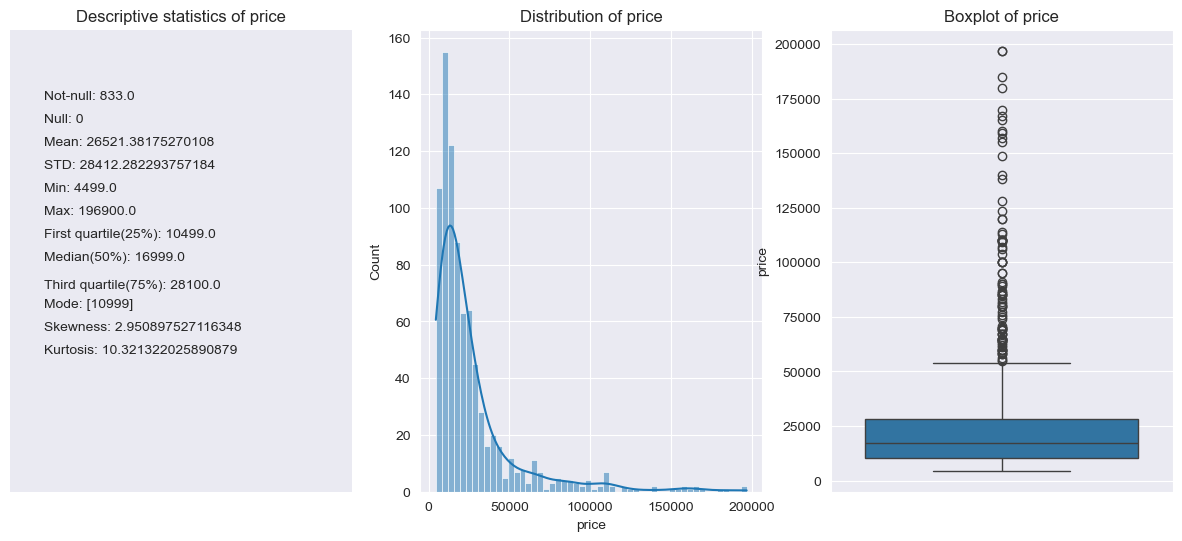

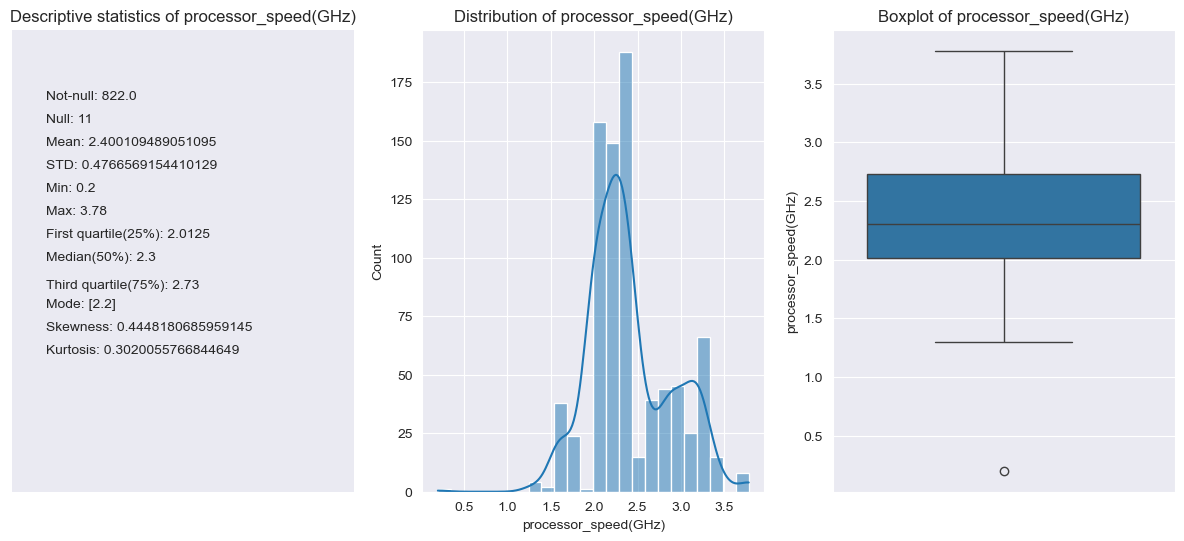

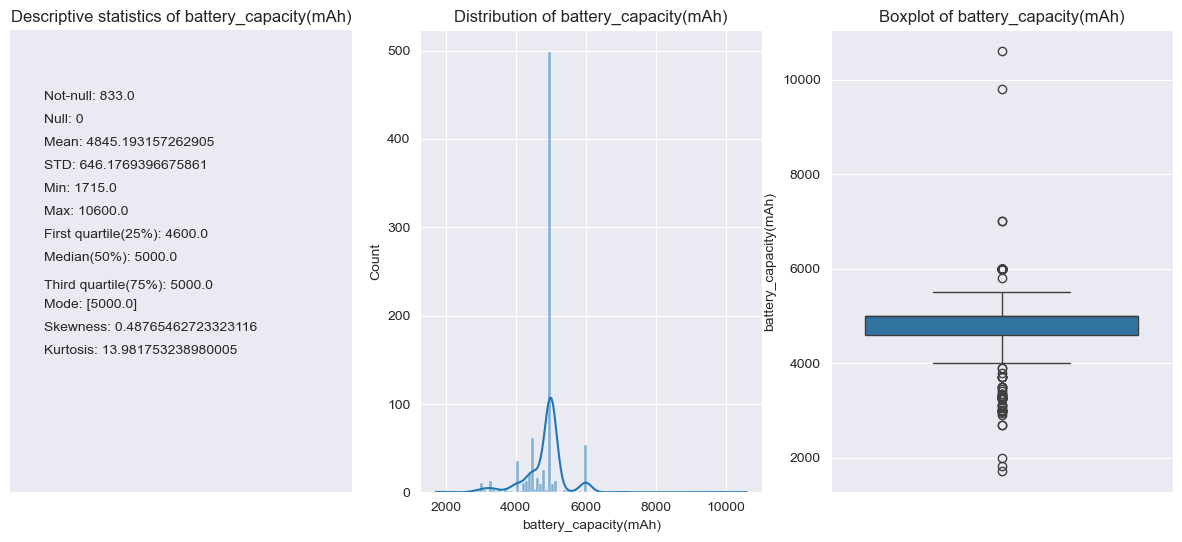

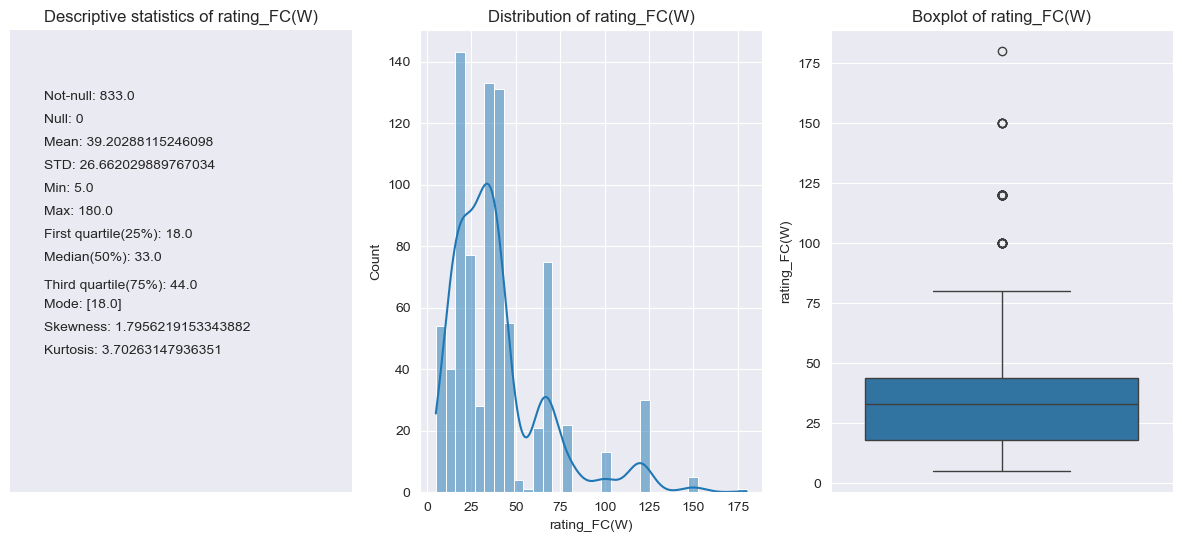

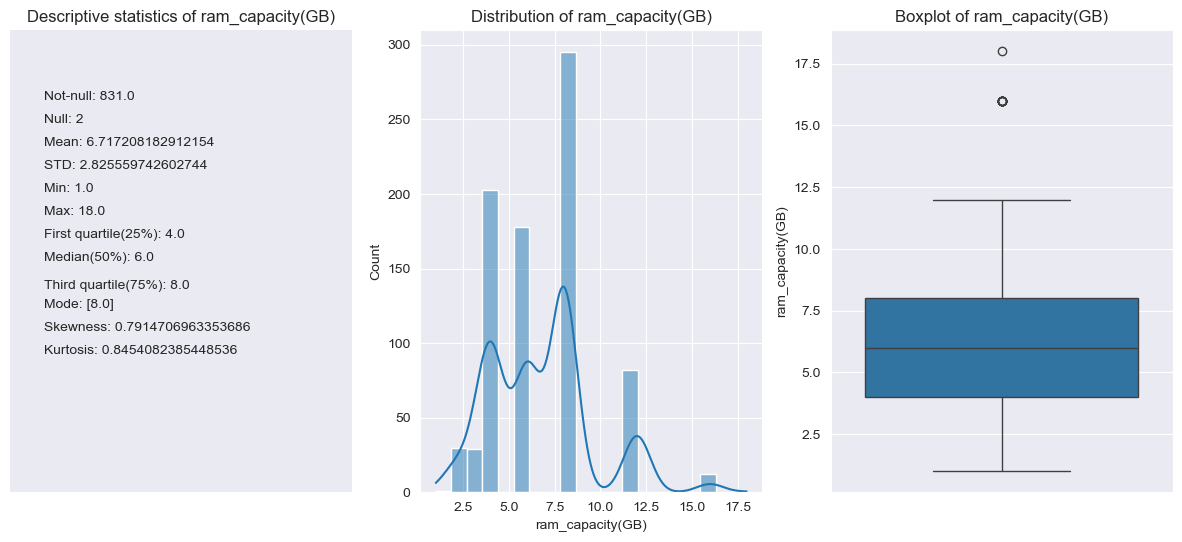

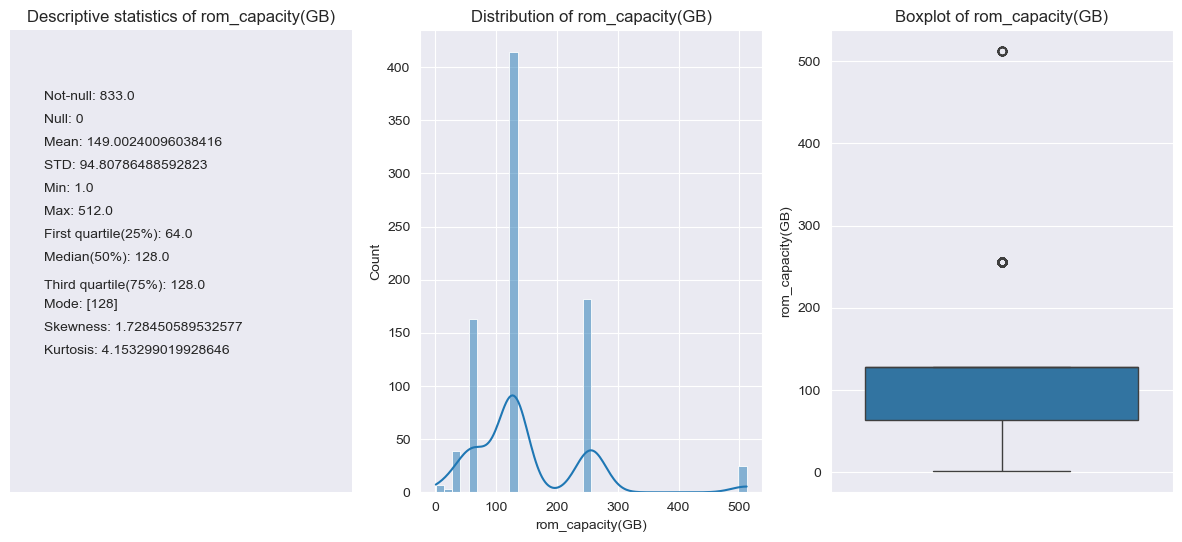

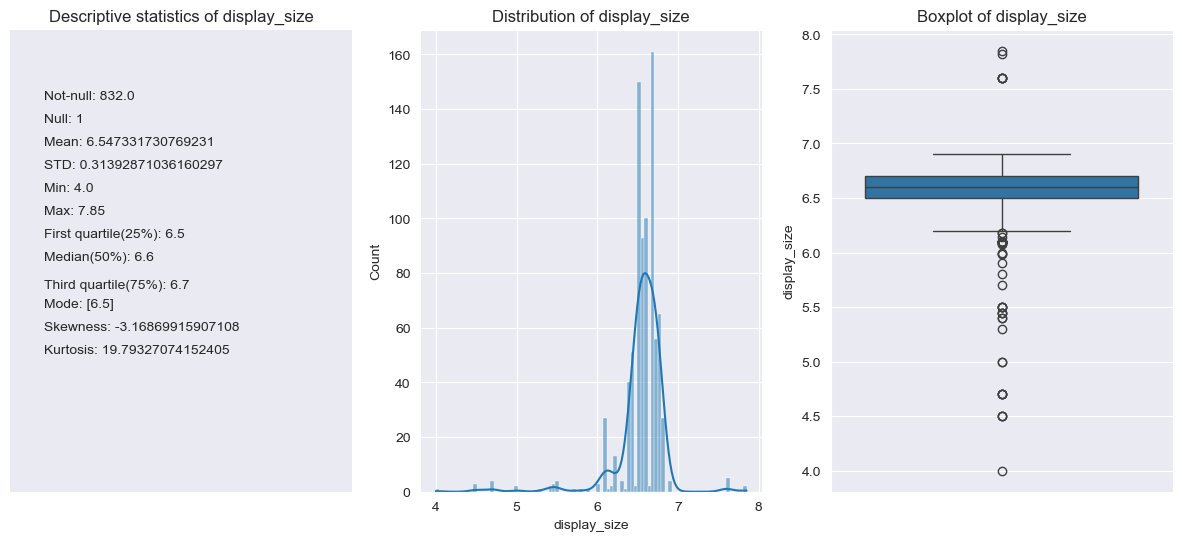

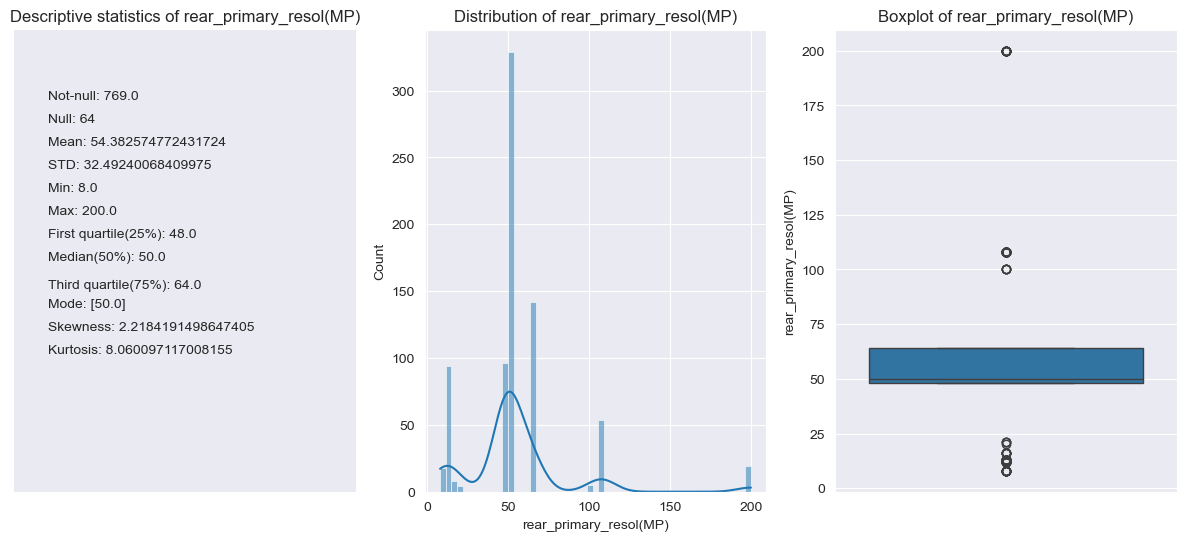

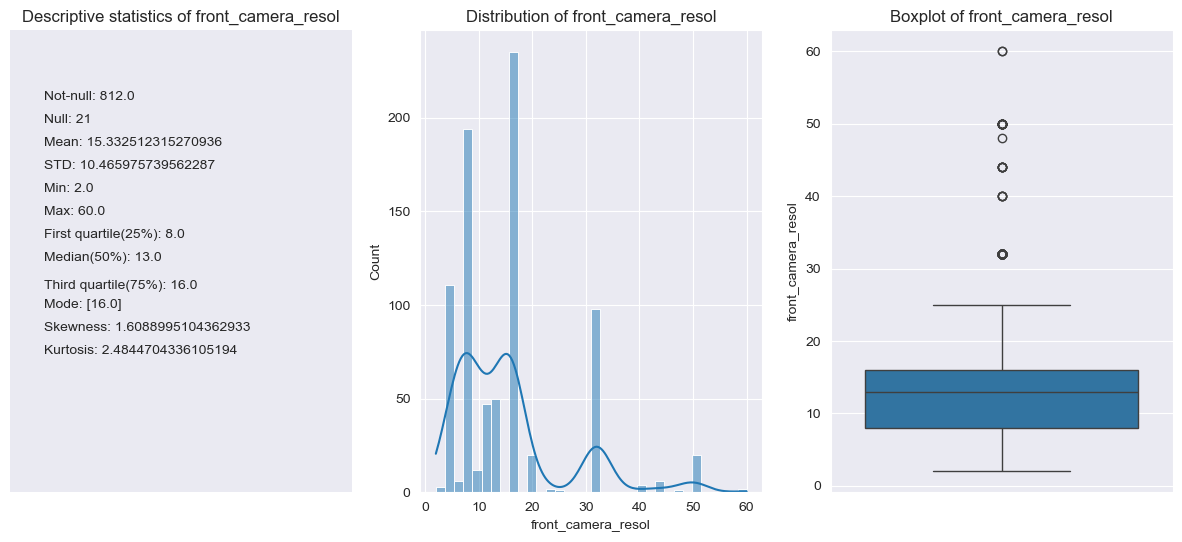

In [22]:
for col in numerical.columns:
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))

    axes[0].set_title(f"Descriptive statistics of {col}")
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[0].spines['bottom'].set_visible(False)
    axes[0].spines['left'].set_visible(False)
    axes[0].grid(False)

    descriptive_stats = numerical[col].describe()
    axes[0].text(0.1, 0.85, f"Not-null: {descriptive_stats['count']}")
    axes[0].text(0.1, 0.8, f"Null: {numerical[col].isna().sum()}")
    axes[0].text(0.1, 0.75, f"Mean: {descriptive_stats['mean']}")
    axes[0].text(0.1, 0.7, f"STD: {descriptive_stats['std']}")
    axes[0].text(0.1, 0.65, f"Min: {descriptive_stats['min']}")
    axes[0].text(0.1, 0.6, f"Max: {descriptive_stats['max']}")
    axes[0].text(0.1, 0.55, f"First quartile(25%): {descriptive_stats['25%']}")
    axes[0].text(0.1, 0.5, f"Median(50%): {descriptive_stats['50%']}")
    axes[0].text(0.1, 0.41, f"Third quartile(75%): {descriptive_stats['75%']}\n")
    axes[0].text(0.1, 0.40, f"Mode: {numerical[col].mode().to_list()}")
    axes[0].text(0.1, 0.35, f"Skewness: {numerical[col].skew()}")
    axes[0].text(0.1, 0.27, f"Kurtosis: {numerical[col].kurtosis()}\n")

    sns.histplot(data=numerical, x=numerical[col], kde=True, ax=axes[1])
    axes[1].set_title(f"Distribution of {col}")
    sns.boxplot(data=numerical, y=numerical[col], ax=axes[2])
    axes[2].set_title(f"Boxplot of {col}")

Note:
- **price** - positive (left-skewed) asymmetry
- **processor_speed (GHz)** - slight positive (left-skewed) asymmetry
- **battery_capacity (mAh)** - slight positive (left-skewed) asymmetry
- **rating_FC (W)** - positive (left-skewed) asymmetry
- **ram_capacity (GB)** - positive (left-skewed) asymmetry
- **rom_capacity (GB)** - positive (left-skewed) asymmetry
- **display_size** - negative (right-skewed) asymmetry
- **rear_primary_resol (MP)** - positive (left-skewed) asymmetry
- **front_camera_resol** - positive (left-skewed) asymmetry

### Analysis of output variable

Text(0.5, 1.0, 'Boxplot of rating')

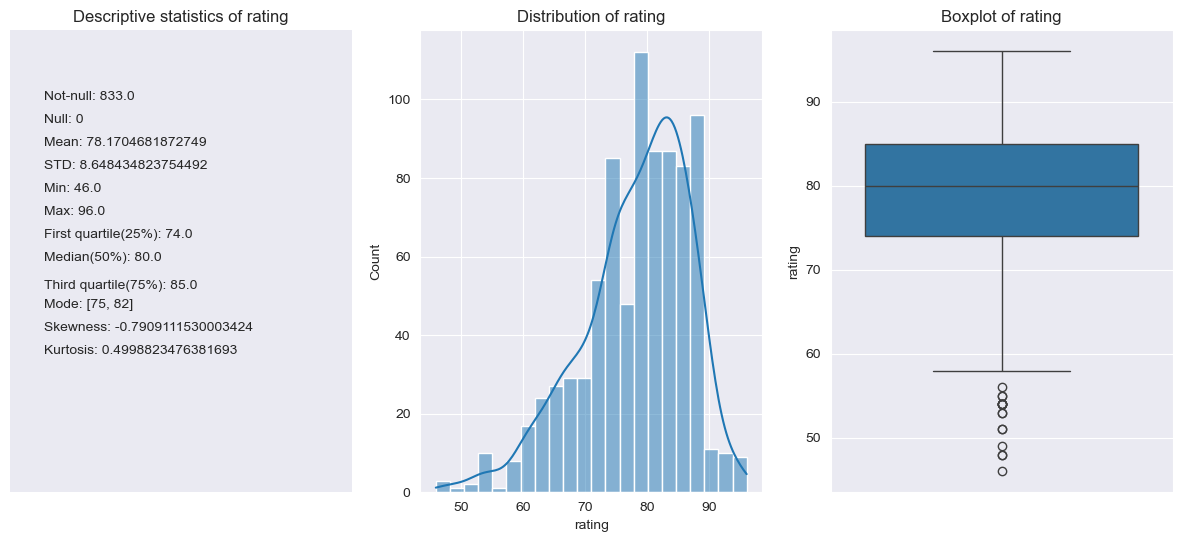

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].set_title(f"Descriptive statistics of rating")
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].grid(False)

descriptive_stats = df['rating'].describe()
axes[0].text(0.1, 0.85, f"Not-null: {descriptive_stats['count']}")
axes[0].text(0.1, 0.8, f"Null: {df['rating'].isna().sum()}")
axes[0].text(0.1, 0.75, f"Mean: {descriptive_stats['mean']}")
axes[0].text(0.1, 0.7, f"STD: {descriptive_stats['std']}")
axes[0].text(0.1, 0.65, f"Min: {descriptive_stats['min']}")
axes[0].text(0.1, 0.6, f"Max: {descriptive_stats['max']}")
axes[0].text(0.1, 0.55, f"First quartile(25%): {descriptive_stats['25%']}")
axes[0].text(0.1, 0.5, f"Median(50%): {descriptive_stats['50%']}")
axes[0].text(0.1, 0.41, f"Third quartile(75%): {descriptive_stats['75%']}\n")
axes[0].text(0.1, 0.40, f"Mode: {df['rating'].mode().to_list()}")
axes[0].text(0.1, 0.35, f"Skewness: {df['rating'].skew()}")
axes[0].text(0.1, 0.27, f"Kurtosis: {df['rating'].kurtosis()}\n")

sns.histplot(data=df, x=df['rating'], kde=True, ax=axes[1])
sns.boxplot(data=df, y=df['rating'], ax=axes[2])
axes[1].set_title(f"Distribution of rating")
axes[2].set_title(f"Boxplot of rating")

Note: negative (right-skewed) asymmetry is present.

### Missed data for numerical data

In [24]:
print("Null values in numerical variables:")
print(numerical.isna().sum())

Null values in numerical variables:
price                      0
processor_speed(GHz)      11
battery_capacity(mAh)      0
rating_FC(W)               0
ram_capacity(GB)           2
rom_capacity(GB)           0
display_size               1
rear_primary_resol(MP)    64
front_camera_resol        21
dtype: int64


### Distribution and categorical balance for categorical data

In [25]:
categorical = df.loc[:, ~df.columns.isin(['Unnamed: 0','price', 'processor_speed(GHz)', 'battery_capacity(mAh)', 'rating_FC(W)', 'ram_capacity(GB)', 'rom_capacity(GB)', 'display_size', 'rear_primary_resol(MP)','front_camera_resol', 'rating'])]
categorical = categorical.drop(['model_name', 'processor_name', 'display_resolution', 'rear_camera_resol'], axis=1)

### Binary data

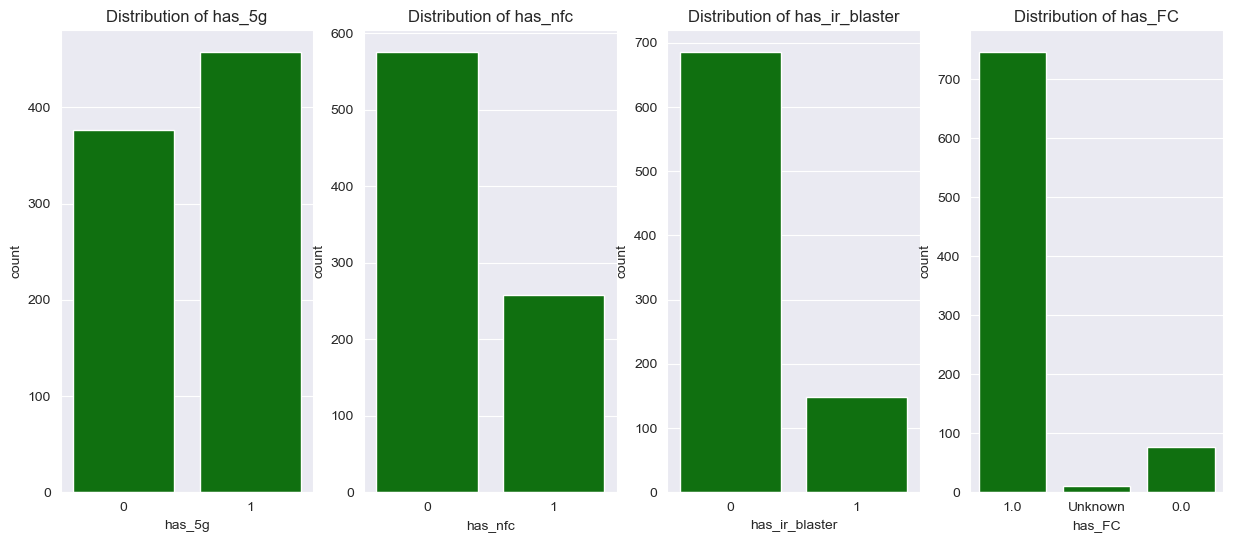

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
for i, col in enumerate(categorical.loc[:, ['has_5g', 'has_nfc', 'has_ir_blaster', 'has_FC']].columns):
    sns.countplot(data=categorical.fillna({col: "Unknown"}), x=col, ax=axes[i], color='green')
    axes[i].set_title(f"Distribution of {col}")

Note: We can identify a group of categorical data with two values (0 or 1) that indicate whether phones have certain additional features:
- **has_5g**: The data is close to balanced, with most phones having 5G.
- **has_nfc**: The data is not balanced, with most phones lacking NFC.
- **has_ir_blaster**: The data is not balanced, with most phones lacking an infrared blaster.
- **has_FC**: There is a small amount of unknown data. The data is not balanced, with the vast majority of smartphones having a front camera.

### Int data

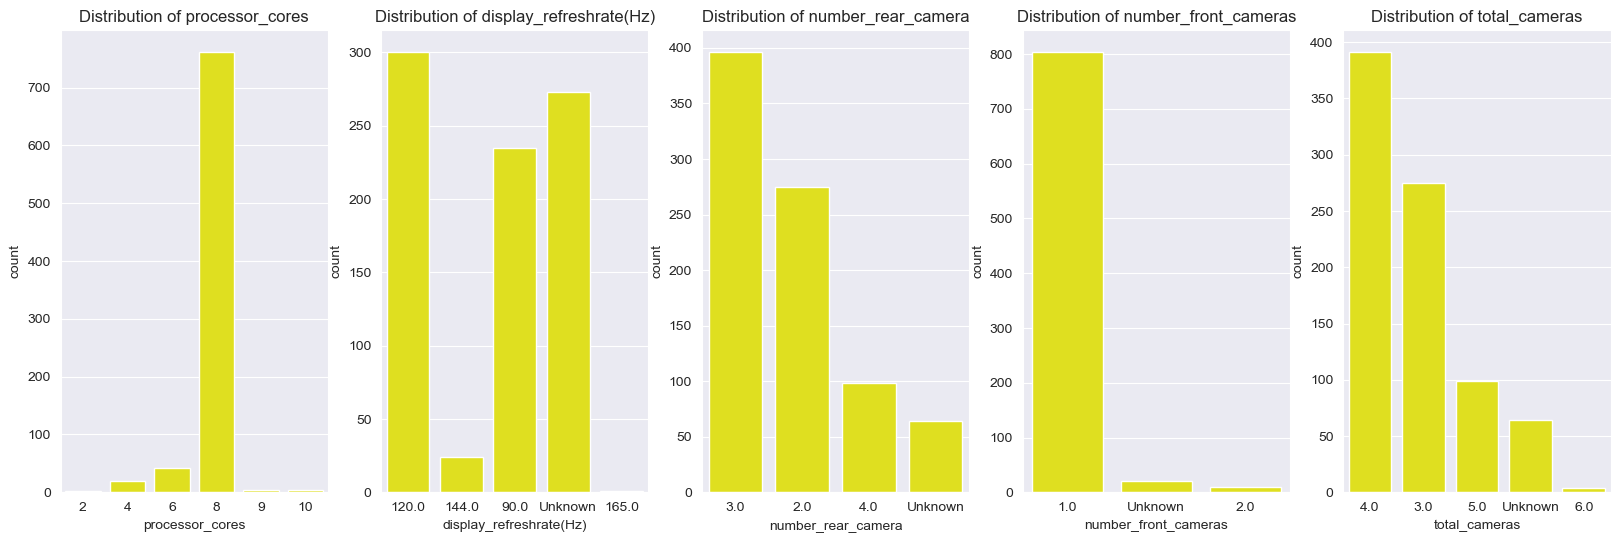

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
for i, col in enumerate(categorical.loc[:, ['processor_cores', 'display_refreshrate(Hz)', 'number_rear_camera', 'number_front_cameras', 'total_cameras']].columns):
    sns.countplot(data=categorical.fillna({col: "Unknown"}), x=col, ax=axes[i], color='yellow')
    axes[i].set_title(f"Distribution of {col}")

**Note:**
We can identify a group of categorical data with integer values that represent certain categories and cannot be considered quantitative:
- **processor_cores**: The data is not balanced, with most phones having 8 processor cores.
- **display_refreshrate (Hz)**: The data is not balanced, with a large amount of unknown data. The majority of known values are 120 (indicating how many times the screen refreshes per second).
- **number_rear_camera**: The data is not balanced, with available options for the number of rear cameras being 2, 3, or 4.
- **number_front_camera**: The data is not balanced, with only 1 or 2 options available. The vast majority have 1 front camera.
- **total_cameras**: The data is not balanced, with most phones having a total of 4 cameras, which is expected since 3 rear cameras and 1 front camera are predominant separately.

### Other categorical data

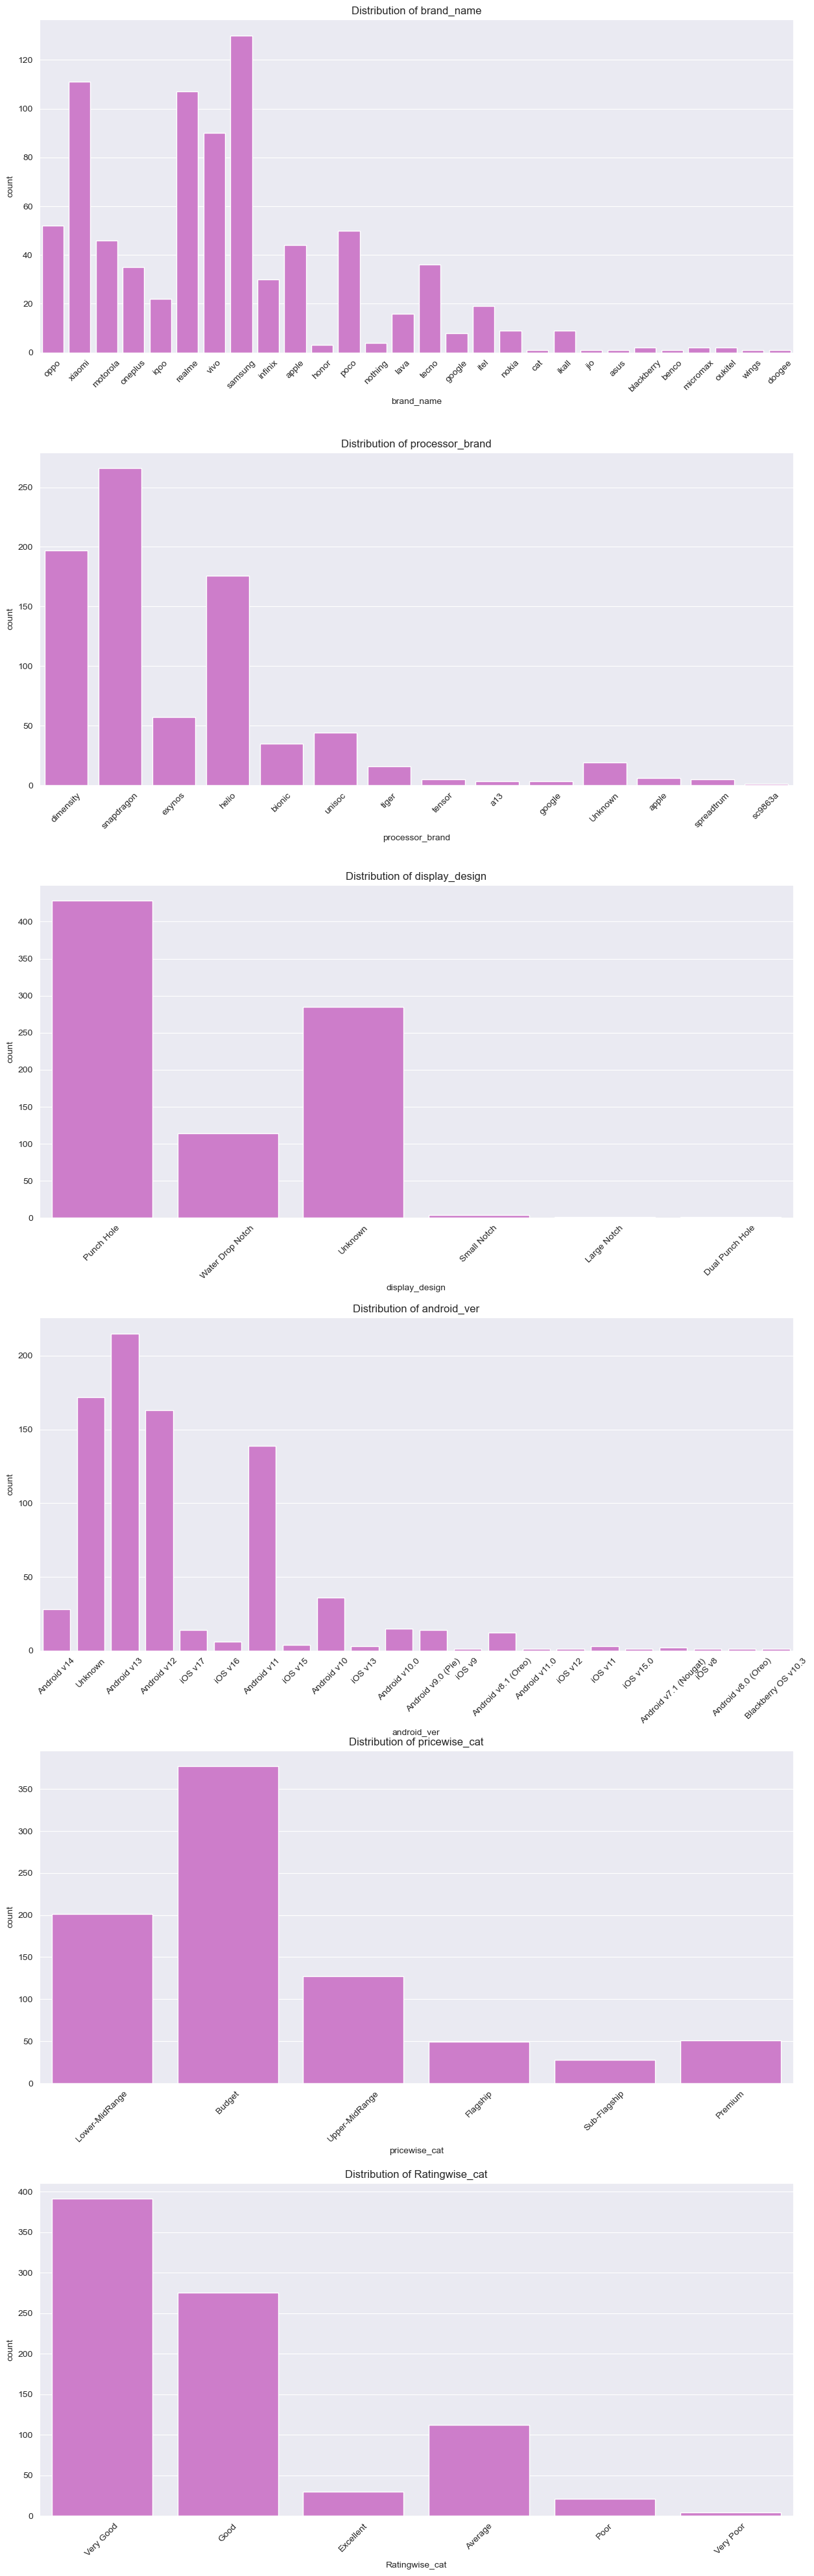

In [28]:
fig, axes = plt.subplots(6, 1, figsize=(15, 50))

for i, col in enumerate(categorical.loc[:, (categorical.dtypes == 'object')].columns):
    sns.countplot(data=categorical.fillna({col: "Unknown"}), x=col, ax=axes[i], color='orchid')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.3)

**Note:**
- **brand_name**: The data is not balanced, with the most popular brands being Samsung, Xiaomi, Vivo, and Realme.
- **processor_brand**: The data is not balanced, with the most popular processor brands being Snapdragon, Dimensity, and Helio.
- **display_design**: The data is not balanced, with the most popular design being Punch Hole, where the front camera is placed in a small cutout directly on the display.
- **android_ver**: The data is not balanced, with the most popular Android versions being 11, 12, and 13.
- **pricewise_cat**: The data is not balanced, but most phones fall into the budget category, while their ratings (Ratingwise_cat) are predominantly very high or high.

### Missed data for categorical data

In [29]:
print("Null values in categorical variables:")
print(categorical.isna().sum())

Null values in categorical variables:
brand_name                   0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand             19
processor_cores              0
has_FC                      10
display_refreshrate(Hz)    273
display_design             285
number_rear_camera          64
number_front_cameras        21
android_ver                172
total_cameras               64
pricewise_cat                0
Ratingwise_cat               0
dtype: int64


## Multivariate analysis

### Correlation matrix for numerical data

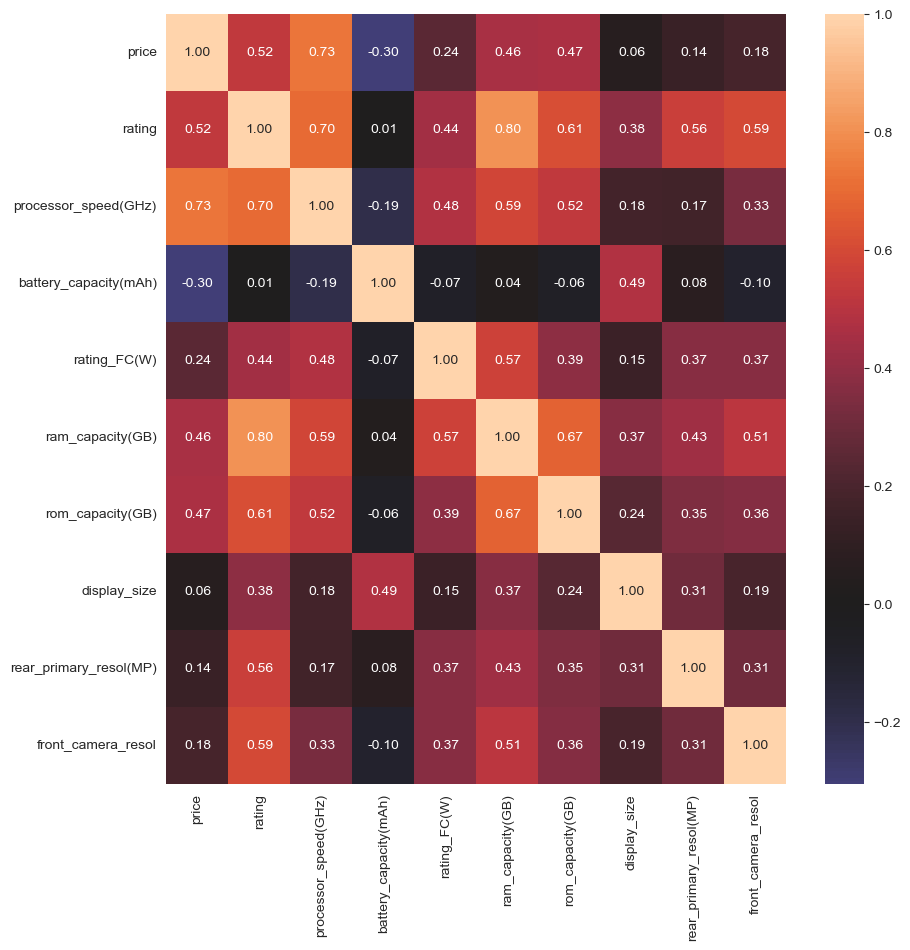

In [30]:
numerical_with_target = df.loc[:, (df.dtypes == 'float64') | (df.dtypes == 'int64')]
numerical_with_target = numerical_with_target.drop(['Unnamed: 0', 'has_FC', 'has_5g', 'has_ir_blaster', 'has_nfc', 'processor_cores', 'display_refreshrate(Hz)','number_rear_camera', 'number_front_cameras', 'total_cameras'], axis=1)

plt.figure(figsize=(10,10))
corr_matrix = numerical_with_target.corr(method='pearson')
sns.heatmap(corr_matrix, fmt=".2f", annot=True, center=0)
plt.show()

**Conclusions:**
Strong correlations are represented by bright pink or bright purple coloring:
- **Rating and price (0.52):** This shows that more expensive phones are generally rated higher.
- **Rating and processor_speed (GHz) (0.7):** Faster processors correspond to higher ratings. However, price is also influenced by processor speed, as the correlation between price and processor_speed (GHz) is 0.73.
- **Rating and camera resolution:** Rating depends on **rear_primary_resol** (rear camera resolution) with a correlation of 0.56 and on **front_camera_resol** (front camera resolution) with a correlation of 0.59.
- The **strongest correlation** is between **rating and ram_capacity (GB)** (0.8), indicating that customers are more satisfied with smartphones that have larger RAM. There is also a noticeable correlation between **rating and rom_capacity (GB)** (internal storage) at 0.61.
- A correlation is also observed between **processor_speed (GHz) and ram_capacity (GB)** (0.59) as well as **processor_speed (GHz) and rom_capacity (GB)** (0.52). Since these characteristics do not directly influence each other, it can be inferred that smartphones with higher RAM/internal storage tend to have faster processors.
- A relationship is also observed between **RAM and internal storage** (0.67).
- **rating_FC (W)** (front camera rating) and **ram_capacity (GB)** show a correlation of 0.57. Additionally, **ram_capacity (GB)** and **front_camera_resol** have a correlation of 0.51. These parameters suggest that phones with better front cameras tend to have larger RAM capacities.

### Statistical tests for evaluation the significance of the difference in the value of the output variable depending on the value of the categorical variable

Let us conduct significance testing across six categories.
To start, we will determine whether the data in six samples, grouped by `pricewise_cat`, is normally distributed.

**Null Hypothesis (H₀):** The data was drawn from a normal distribution.
**Alternative Hypothesis (H₁):** The data was not drawn from a normal distribution.

In [31]:
subgroups = df.groupby('pricewise_cat')['rating']
samples = [subgroups.get_group(x).to_numpy() for x in df.loc[:, 'pricewise_cat'].unique()]

In [32]:
pvalues_norm_test = np.array([st.shapiro(sample).pvalue for sample in samples])
if all(p > 0.05 for p in pvalues_norm_test):
    print("Failed to reject H0. The data was drawn from a normal distribution.\n")
else:
    print("Reject H0. The data was not drawn from a normal distribution.\n")

Reject H0. The data was not drawn from a normal distribution.



Since the data is not normally distributed, we will choose the H-test (Kruskal-Wallis test), a non-parametric version of ANOVA designed for analyzing more than three samples.

**Null Hypothesis (H₀):** There is no significant difference in the dependent variable `rating` based on the values of the categorical variable `pricewise_cat`.
**Alternative Hypothesis (H₁):** There is a significant difference in the dependent variable `rating` based on the values of the categorical variable `pricewise_cat`.

In [33]:
statistic, p_value = st.kruskal(samples[0], samples[1], samples[2], samples[3], samples[4], samples[5])
if p_value > 0.05:
    print("Failed to reject H0.\n")
else:
    print("Reject H0.\n")

Reject H0.



Since we reject the null hypothesis, the difference in the value of the dependent variable "rating" depending on the value of the categorical variable "pricewise_cat" is significant, meaning that the price category strongly influences user ratings.